<a href="https://colab.research.google.com/github/aadhil96/Web-scraping-Sri-Lanka-Fuel-Prices/blob/main/Web_scraping_Sri_Lanka_Fuel_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The Building Blocks
#year = '2019'
url_link = 'http://ceypetco.gov.lk/historical-prices/'

# Combining the URL + year strings together
#url = url_link.format(year)
url_link

'http://ceypetco.gov.lk/historical-prices/'

In [2]:
import pandas as pd

In [3]:
df = pd.read_html(url_link, header = 0)
petrol_prices = df[0]

In [4]:
petrol_prices.head()

,Date of Effective,LP 95,LP 92,LAD,LSD,LK,LIK,FUR.800,FUR.(sup),FUR.1500
0,01.03.1990,22.00,20.00,9.60,10.90,6.58,9.85,4.70,NaN,4.29
1,14.08.1990,27.00,25.00,11.00,12.50,8.00,9.85,5.40,NaN,4.90
2,05.11.1990,38.00,35.00,13.00,15.00,8.80,9.85,6.30,NaN,5.60
3,26.12.1990,32.50,30.00,11.00,13.00,8.80,9.85,6.30,NaN,5.60
4,01.01.1991,32.50,30.00,11.00,13.00,8.80,9.85,6.25,NaN,5.55


In [5]:
petrol_prices.tail()

,Date of Effective,LP 95,LP 92,LAD,LSD,LK,LIK,FUR.800,FUR.(sup),FUR.1500
107,11.06.2019,164.00,138.00,104.00,136.00,70.00,110.00,92.00,96.00,96.00
108,11.07.2019,159.00,136.00,104.00,131.00,70.00,110.00,92.00,96.00,96.00
109,13.08.2019,163.00,138.00,104.00,134.00,70.00,110.00,00.00,96.00,96.00
110,10.09.2019,161.00,137.00,104.00,132.00,70.00,110.00,00.00,96.00,96.00
111,Date of Effective,LP 95,LP 92,LAD,LSD,LK,LIK,FUR.800,FUR.(sup),FUR.1500


In [6]:
petrol_prices = petrol_prices.drop(petrol_prices.index[111])

In [7]:
petrol_prices.shape

(111, 10)

In [18]:
petrol_prices.to_csv(r'sl_petrol_prices.csv')

In [8]:
petrol_prices.isnull().sum()

Date of Effective     0
LP 95                 0
LP 92                 0
LAD                   0
LSD                   0
LK                    0
LIK                   0
FUR.800               0
FUR.(sup)            87
FUR.1500              9
dtype: int64

In [9]:
petrol_prices.dtypes

Date of Effective    object
LP 95                object
LP 92                object
LAD                  object
LSD                  object
LK                   object
LIK                  object
FUR.800              object
FUR.(sup)            object
FUR.1500             object
dtype: object

In [10]:
petrol_prices = petrol_prices.rename(columns={"Date of Effective": "Date", "LP 95": "LP95" , "LP 92": "LP92"})

In [11]:
petrol_prices['LP95'] = pd.to_numeric(petrol_prices['LP95'],errors='coerce')
petrol_prices['LP92'] = pd.to_numeric(petrol_prices['LP92'],errors='coerce')

In [12]:
petrol_prices.dtypes

Date          object
LP95         float64
LP92         float64
LAD           object
LSD           object
LK            object
LIK           object
FUR.800       object
FUR.(sup)     object
FUR.1500      object
dtype: object

In [13]:
petrol_prices['Date'] = pd.to_datetime(petrol_prices['Date'])

In [14]:
petrol_prices.dtypes

Date         datetime64[ns]
LP95                float64
LP92                float64
LAD                  object
LSD                  object
LK                   object
LIK                  object
FUR.800              object
FUR.(sup)            object
FUR.1500             object
dtype: object

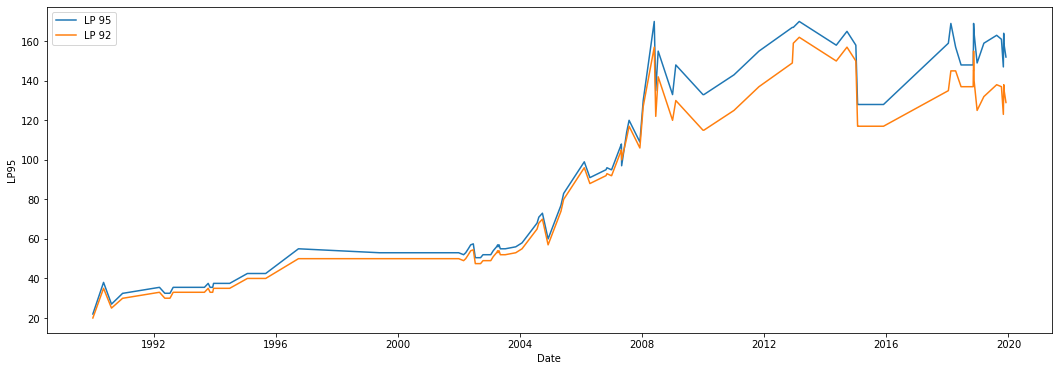

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
sns.lineplot(x ='Date' , y='LP95' , data = petrol_prices , label='LP 95')
sns.lineplot(x ='Date' , y='LP92' , data = petrol_prices , label='LP 92')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


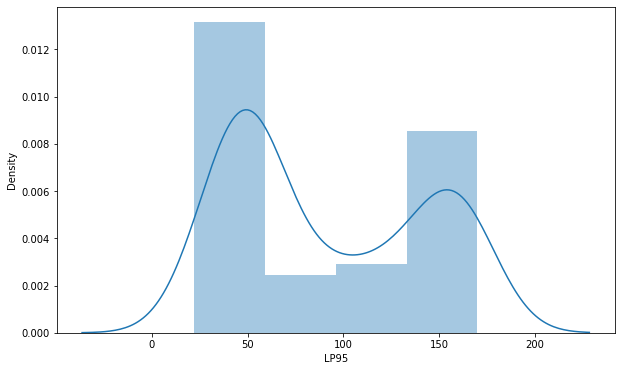

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(petrol_prices.LP95)

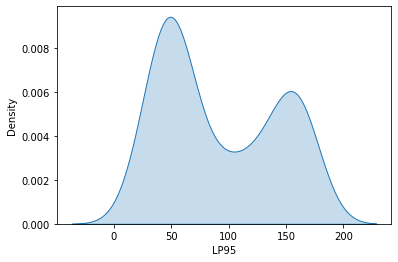

In [17]:
sns.kdeplot(petrol_prices['LP95'],shade=True)
plt.show() 